<a href="https://colab.research.google.com/github/farisnanosoft/Lip-Reading-CNN/blob/main/lip_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Preparing to unpack .../04-gnupg_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg (2.1.15-1ubuntu8.1) over (2.1.15-1ubuntu8) ...
Preparing to unpack .../05-gnupg-agent_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg-agent (2.1.15-1ubuntu8


Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up gnupg-agent (2.1.15-1ubuntu8.1) ...
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up gnupg (2.1.15-1ubuntu8.1) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17) ...
Setting up dbus (1.10.22-1ubunt

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
import os
os.chdir("drive/")
!ls

ADFWeek1_Participant.zip  model_lip_vgg16.h5
Colab Notebooks		  Personal
drive			  previous_test_concat (1).jpg
face_detection_cv.ipynb   previous_test_concat.jpg
lip_dataset.h5		  PRO
lip_dataset_p_w.h5	  __pycache__
lip_dataset_p_w_v1.h5	  resnets_utils (1736a74d).py
lip_p_w_vgg16.ipynb	  resnets_utils.py
lip_res50.ipynb		  SAMSUNG_MEMO
model_celeb_vgg16.h5	  test3.jpg
model_lip.h5		  this_message_in_html.htm.odt
model_lip_p_w_vgg16.h5	  train_lip.h5


In [ ]:
!ls

datalab


In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, regularizers
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
K.clear_session()

Using TensorFlow backend.


In [ ]:
!pip install keras_vggface

In [ ]:
import numpy as np
from keras_vggface import VGGFace
from keras.preprocessing import image
from keras_vggface import utils
import keras
import unittest

In [ ]:
keras.backend.set_image_dim_ordering('tf')
model = VGGFace(model='vgg16')
model.save('model_celeb_vgg16.h5')

In [ ]:
img = image.load_img('test3.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1)
preds = model.predict(x)
#print ('\n', "VGG16")
#print('\n',preds)
print('\n','Predicted:', utils.decode_predictions(preds))

In [ ]:
model = load_model('model_celeb_vgg16.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
#with h5py.File("lip_dataset.h5", "r") as hf:
#    X_train_orig, Y_train_orig, X_test_orig, Y_test_orig=hf["train_orig_x"][:],hf["train_orig_y"][:],hf["valid_orig_x"][:],hf["valid_orig_y"][:]
with h5py.File("lip_dataset_p_w.h5", "r") as hf:
    X_train_orig, Y_train_orig, X_valid_orig, Y_valid_orig, X_test_orig, Y_test_orig=hf["train_orig_x"][:],hf["train_orig_y"][:],hf["valid_orig_x"][:],hf["valid_orig_y"][:],hf["test_orig_x"][:],hf["test_orig_y"][:]

In [ ]:
X_train_orig, Y_train_orig, X_valid_orig, Y_valid_orig, X_test_orig, Y_test_orig=X_train_orig[Y_train_orig<=10], Y_train_orig[Y_train_orig<=10], X_valid_orig[Y_valid_orig<=10], Y_valid_orig[Y_valid_orig<=10], X_test_orig[Y_test_orig<=10], Y_test_orig[Y_test_orig<=10]
#X_train_orig, Y_train_orig, X_valid_orig, Y_valid_orig, X_test_orig, Y_test_orig=X_train_orig[Y_train_orig!=9], Y_train_orig[Y_train_orig!=9], X_valid_orig[Y_valid_orig!=9], Y_valid_orig[Y_valid_orig!=9], X_test_orig[Y_test_orig!=9], Y_test_orig[Y_test_orig!=9]
Y_train_orig[1:10]<=10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
#imshow(X_train_orig[0])
# Normalize image vectors
X_train,X_valid,X_test=[],[],[]
X_train = X_train_orig/255.
X_valid = X_valid_orig/255.
X_test = X_test_orig/255.

Y_train_orig=Y_train_orig-1
Y_valid_orig=Y_valid_orig-1
Y_test_orig=Y_test_orig-1
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 10).T
Y_valid = convert_to_one_hot(Y_valid_orig, 10).T
Y_test = convert_to_one_hot(Y_test_orig, 10).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of valid examples = " + str(X_valid.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_valid shape: " + str(X_valid.shape))
print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1200
number of valid examples = 100
number of test examples = 100
X_train shape: (1200, 224, 224, 3)
Y_train shape: (1200, 10)
X_valid shape: (100, 224, 224, 3)
Y_valid shape: (100, 10)
X_test shape: (100, 224, 224, 3)
Y_test shape: (100, 10)


In [ ]:
#imshow(X_train_orig[0])
# Normalize image vectors
X_train,X_test=[],[]
X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train_orig=Y_train_orig-1
Y_test_orig=Y_test_orig-1
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 10).T
Y_test = convert_to_one_hot(Y_test_orig, 10).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 1162
number of test examples = 100
X_train shape: (1162, 224, 224, 3)
Y_train shape: (1162, 10)
X_test shape: (100, 224, 224, 3)
Y_test shape: (100, 10)


In [ ]:
Y_train[50]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
# use transfer learning for re-training the last layers
# Freeze first 25 layers, so that we can retrain 26th and so on using our classes.
#for layer in model.layers[:-5]:
#   layer.trainable = False

for layer in model.layers:
    layer.trainable = False
#seed=0
# Adding our new layers
#top_layers = model.output
top_layers = model.get_layer('flatten').output
#top_layers = Flatten(input_shape=model.output_shape[1:])(top_layers)
#top_layers = Flatten(name='flatten_a')(top_layers)
#top_layers = Dense(10, activation="relu",input_shape=(10,))(top_layers)
#top_layers = Dropout(0.5)(top_layers)
#top_layers = Dense(512, activation="relu")(top_layers)
top_layers = Dense(64, activation="relu",kernel_regularizer=regularizers.l2(.001),name='output_layer_a')(top_layers)
top_layers = Dense(64, activation="relu",name='output_layer_b')(top_layers)
top_layers = Dropout(0.3)(top_layers)
top_layers = Dense(10, activation="softmax",name='output_layer_c')(top_layers)

# Add top layers on top of freezed (not re-trained) layers of VGG16
model_final = Model(input = model.input, output = top_layers)

# Compile the model
#model_final.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize test and training data
datagen = ImageDataGenerator(
    rescale=1./255,channel_shift_range=.3)
datagen.fit(X_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ou...)`


In [ ]:
model_final.fit(X_train, Y_train, shuffle=True, epochs = 10, batch_size = 64)

In [ ]:
model_final.fit(X_train, Y_train, shuffle=True, epochs = 20, batch_size = 64,validation_data=(X_valid, Y_valid))

Train on 1200 samples, validate on 100 samples
Epoch 1/20
1200/1200 [==============================] - 13s 11ms/step - loss: 2.3408 - acc: 0.1233 - val_loss: 2.3208 - val_acc: 0.1000
Epoch 2/20
1200/1200 [==============================] - 12s 10ms/step - loss: 2.2011 - acc: 0.2608 - val_loss: 2.2944 - val_acc: 0.1800
Epoch 3/20
1200/1200 [==============================] - 12s 10ms/step - loss: 2.0374 - acc: 0.3825 - val_loss: 2.2697 - val_acc: 0.2100
Epoch 4/20
1200/1200 [==============================] - 12s 10ms/step - loss: 1.8443 - acc: 0.4592 - val_loss: 2.2305 - val_acc: 0.2000
Epoch 5/20
1200/1200 [==============================] - 12s 10ms/step - loss: 1.6056 - acc: 0.5708 - val_loss: 2.1821 - val_acc: 0.2300
Epoch 6/20
1200/1200 [==============================] - 12s 10ms/step - loss: 1.3594 - acc: 0.6750 - val_loss: 2.1405 - val_acc: 0.2700
Epoch 7/20
1200/1200 [==============================] - 12s 10ms/step - loss: 1.2140 - acc: 0.7342 - val_loss: 2.1681 - val_acc: 0.2600
E

1200/1200 [==============================] - 12s 10ms/step - loss: 0.9222 - acc: 0.8392 - val_loss: 2.1091 - val_acc: 0.2900
Epoch 10/20
1200/1200 [==============================] - 12s 10ms/step - loss: 0.8256 - acc: 0.8650 - val_loss: 2.0551 - val_acc: 0.3000
Epoch 11/20
1200/1200 [==============================] - 12s 10ms/step - loss: 0.7631 - acc: 0.8850 - val_loss: 2.1296 - val_acc: 0.2600
Epoch 12/20
1200/1200 [==============================] - 12s 10ms/step - loss: 0.6834 - acc: 0.9175 - val_loss: 2.0508 - val_acc: 0.3000
Epoch 13/20
1200/1200 [==============================] - 12s 10ms/step - loss: 0.6362 - acc: 0.9233 - val_loss: 2.1238 - val_acc: 0.2800
Epoch 14/20
1200/1200 [==============================] - 12s 10ms/step - loss: 0.5951 - acc: 0.9317 - val_loss: 2.0295 - val_acc: 0.3100
Epoch 15/20
1200/1200 [==============================] - 12s 10ms/step - loss: 0.5660 - acc: 0.9450 - val_loss: 2.0894 - val_acc: 0.3300
Epoch 16/20
1200/1200 [==============================

1200/1200 [==============================] - 12s 10ms/step - loss: 0.4940 - acc: 0.9608 - val_loss: 2.0564 - val_acc: 0.2700
Epoch 18/20
1200/1200 [==============================] - 12s 10ms/step - loss: 0.4726 - acc: 0.9625 - val_loss: 2.0018 - val_acc: 0.2700
Epoch 19/20
1200/1200 [==============================] - 12s 10ms/step - loss: 0.4431 - acc: 0.9792 - val_loss: 2.1177 - val_acc: 0.3000
Epoch 20/20
1200/1200 [==============================] - 12s 10ms/step - loss: 0.4344 - acc: 0.9650 - val_loss: 2.1163 - val_acc: 0.2800


In [ ]:
model_final.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),shuffle=True,
                    steps_per_epoch=len(X_train)/32, epochs=10,validation_data=(X_valid, Y_valid),validation_steps=len(X_valid))

Epoch 1/10
38/37 [==============================] - 12s 326ms/step - loss: 2.3030 - acc: 0.0872 - val_loss: 2.2993 - val_acc: 0.1000
Epoch 2/10
38/37 [==============================] - 12s 311ms/step - loss: 2.3022 - acc: 0.1299 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 3/10
38/37 [==============================] - 12s 311ms/step - loss: 2.3015 - acc: 0.1332 - val_loss: 2.3012 - val_acc: 0.1100
Epoch 4/10
38/37 [==============================] - 12s 311ms/step - loss: 2.3008 - acc: 0.1077 - val_loss: 2.3456 - val_acc: 0.1000
Epoch 5/10
38/37 [==============================] - 12s 311ms/step - loss: 2.2999 - acc: 0.1283 - val_loss: 2.3624 - val_acc: 0.1500
Epoch 6/10
38/37 [==============================] - 12s 310ms/step - loss: 2.2987 - acc: 0.1340 - val_loss: 2.4330 - val_acc: 0.1600
Epoch 7/10
 1/37 [..............................] - ETA: 10s - loss: 2.2940 - acc: 0.3750

38/37 [==============================] - 12s 312ms/step - loss: 2.2971 - acc: 0.1850 - val_loss: 2.4015 - val_acc: 0.1500
Epoch 8/10
38/37 [==============================] - 12s 310ms/step - loss: 2.2951 - acc: 0.2319 - val_loss: 2.5568 - val_acc: 0.1200
Epoch 9/10
38/37 [==============================] - 12s 310ms/step - loss: 2.2934 - acc: 0.1785 - val_loss: 2.6587 - val_acc: 0.1500
Epoch 10/10
38/37 [==============================] - 12s 309ms/step - loss: 2.2910 - acc: 0.2097 - val_loss: 2.8482 - val_acc: 0.1600


In [ ]:
model_final=load_model('model_lip_vgg16.h5')

In [ ]:
preds = model_final.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

100/100 [==============================] - 1s 11ms/step
Loss = 2.4567145252227784
Test Accuracy = 0.23


In [ ]:
model_final.save('model_lip_vgg16.h5')

In [ ]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

In [ ]:
#imshow(X_test[0])
x_e=np.expand_dims(X_test[53], axis=0)
print(model_final.predict(x_e),np.argmax(model_final.predict(x_e))+1,np.argmax(Y_test[53])+1)

[[0.04833171 0.03603892 0.08017018 0.39235058 0.04579169 0.2875798
  0.01155317 0.01450408 0.06591528 0.0177646 ]] 4 6


Input image shape: (1, 224, 224, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] 9


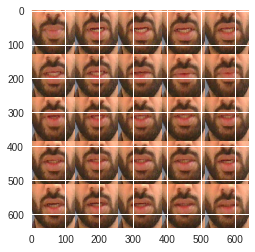

In [ ]:
img_path = 'previous_test_concat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
i_x = image.img_to_array(img)
i_x = np.expand_dims(i_x, axis=0)
i_x = preprocess_input(i_x)
print('Input image shape:', i_x.shape)
my_image = scipy.misc.imread(img_path)
imshow(my_image)
print(model_final.predict(i_x),np.argmax(model_final.predict(i_x))+1)

In [ ]:
y_pred_test = model_final.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
Y_test_orig[1:10].T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

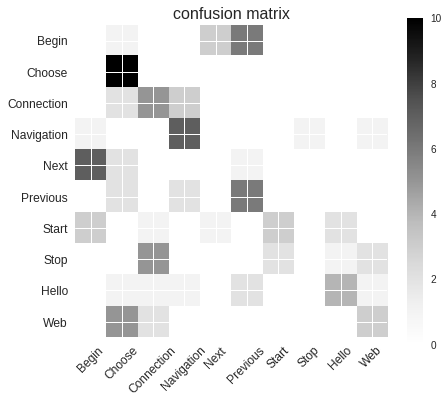

Test accuracy: 0.38


In [ ]:
y_classes=['Begin','Choose','Connection','Navigation','Next','Previous','Start','Stop','Hello','Web']
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.title('confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(Y_test_orig,y_pred_test_classes))
plt.xticks(np.arange(10),y_classes,rotation=45,fontsize=12)
plt.yticks(np.arange(10),y_classes,fontsize=12)
plt.colorbar()
plt.show()
print('Test accuracy:',accuracy_score(Y_test_orig,y_pred_test_classes))